<a href="https://colab.research.google.com/github/junyang-chin/DSUB-5.0/blob/Day-10/Day_10_Evaluating_Model_Accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Producing a Classification Model using the Framingham Dataset
This is a supervised learning using the Decision Treee method on the Framingham dataset


## Importing the dataset into dataframe

In [45]:
import pandas as pd
import seaborn as sns

In [46]:
df = pd.read_csv("https://raw.githubusercontent.com/theleadio/datascience_demo/master/framingham.csv")

## Making a Decision Tree Classification Model with sklearn

In [47]:
df.describe()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


### Dropping rows with missing values

In [48]:
df = df.dropna()

Preparing the data for modelling

In [49]:
train_data = df.drop('prevalentHyp', axis = 1)
train_labels = df['prevalentHyp']

### Fitting the Decision Tree Classifier Model with training data

In [50]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth = 3)
model.fit(train_data, train_labels)

DecisionTreeClassifier(max_depth=3)

### Visualising the Decision Tree Model 1

In [51]:
import graphviz
columns = list(train_data.columns)
dot_data = tree.export_graphviz(model, out_file = None, feature_names = columns, class_names = ["No", "Yes"], filled = True, rounded = True)

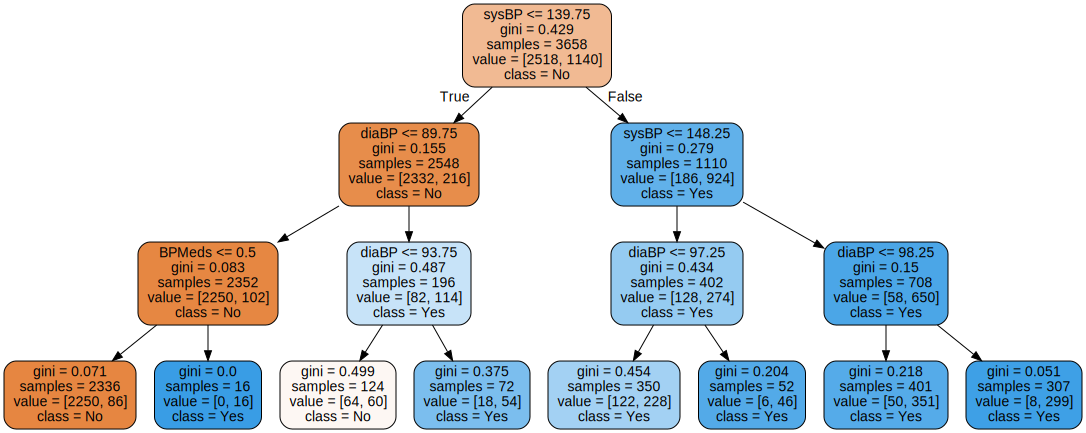

In [52]:
graph = graphviz.Source(dot_data)
graph

If a person have the following condition:
* Systolic Blood Pressure below 139.75 and
* systolic Blood Pressure below 89.75
* On blood pressure medications

The person will most likely have prevalent hypertension. 
However the model looks really messy as most end up with hypertension based on blood pressure. Let's explore more on other factors

### Evaluating the Decision Tree Model 1



In [53]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split the model into train and test portion
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size = 0.3, random_state = 1)

In [54]:
# Create model and fit with train data
model = tree.DecisionTreeClassifier(max_depth = 3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [55]:
# Predict using model with test data
y_pred = model.predict(X_test)

In [56]:
#Evaluate model accuracy of predicted result vs test result
from sklearn import metrics
print("Accuracy :", metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.9025500910746812


### Visualising Decision Tree 2

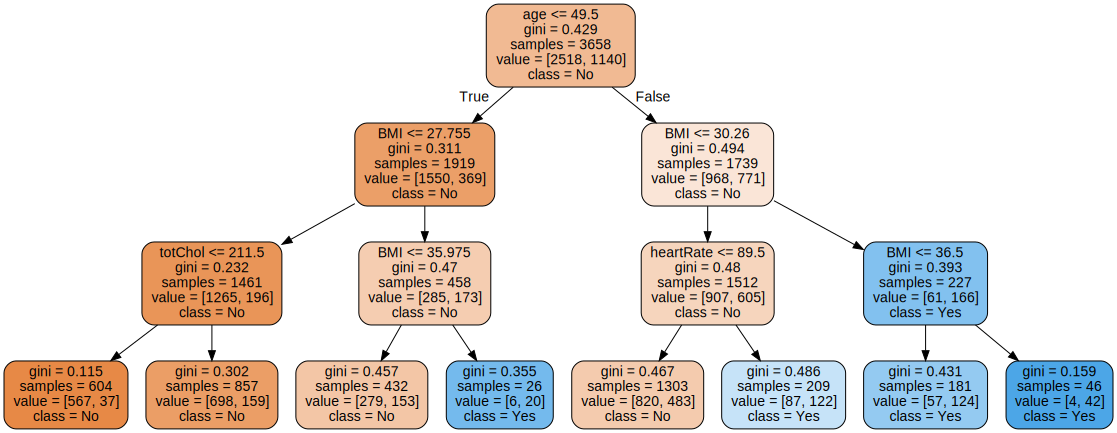

In [57]:
train_data = df.drop(["prevalentHyp","sysBP","diaBP","BPMeds"], axis = 1)
train_labels = df["prevalentHyp"]
model = tree.DecisionTreeClassifier(max_depth = 3)
model.fit(train_data, train_labels)
columns = list(train_data.columns)
dot_data = tree.export_graphviz(model, out_file = None, feature_names = columns, class_names = ["No", "Yes"], filled = True, rounded = True)
graph = graphviz.Source(dot_data)
graph

If a person is:
* Over the age of 50
* Having BMI >36.5(Obese)

It is very likely the person have prevalent hypertension

Besides, if a person is:
* Below the age of 50
* Having a BMI below 27 (Underweight/Healthy/Slight Overweight)
* Having total Cholestrol level below 211.5

The person is unlikely to have prevalent hypertension.


### Evaluating the Decision Tree Model 2


In [58]:
# Split the model into train and test portion
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size = 0.3, random_state = 1)
# Create model then fit with training data
model = tree.DecisionTreeClassifier(max_depth = 3)
model.fit(X_train, y_train)

#predict model with test data
y_pred = model.predict(X_test)

# Evaluate model accuracy of predicted result vs test result
print("Accuracy :", metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.7194899817850637
